<a href="https://colab.research.google.com/github/yeray142/AIML_class/blob/master/Week7/AIML_week7_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 7 - Practice class**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
cd drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


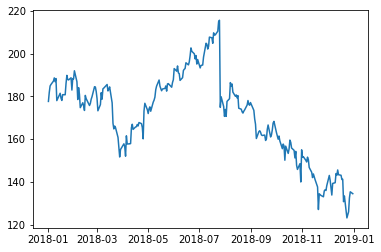

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

## **Task 1**

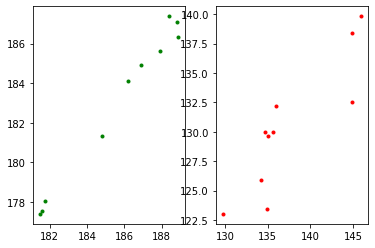

In [7]:
fig, axes = plt.subplots(1, 2)
axes[0].plot('high', 'low', '.g', data=fb.head(10))
axes[1].plot('high', 'low', '.r', data=fb.tail(10))

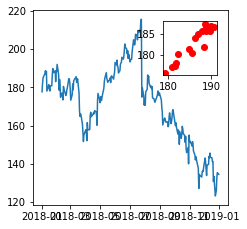

In [11]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9]).plot(fb.index, fb.open)
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25]).plot('high', 'low', 'or', data=fb.head(20))

## **Task 2**

In [12]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [13]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

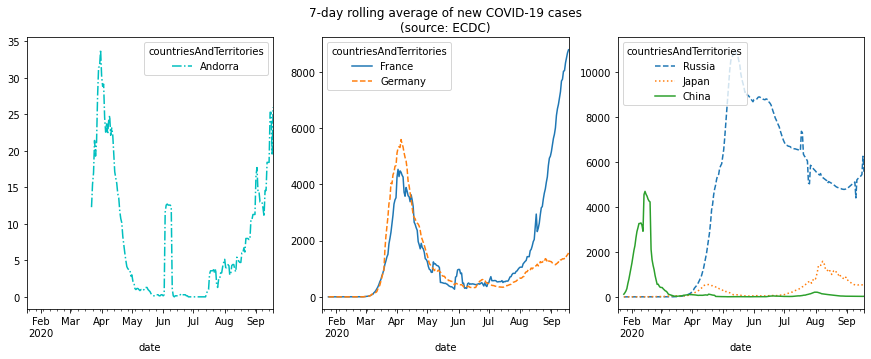

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['Andorra']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['France', 'Germany']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Russia', 'Japan', 'China']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

What happend to Luxembourg data?

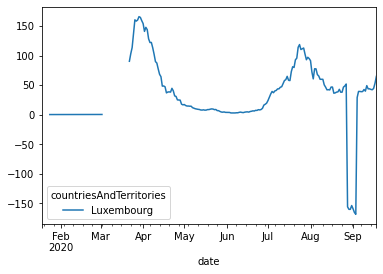

In [21]:
new_cases_rolling_average[['Luxembourg']].plot(style=['-', '-'])

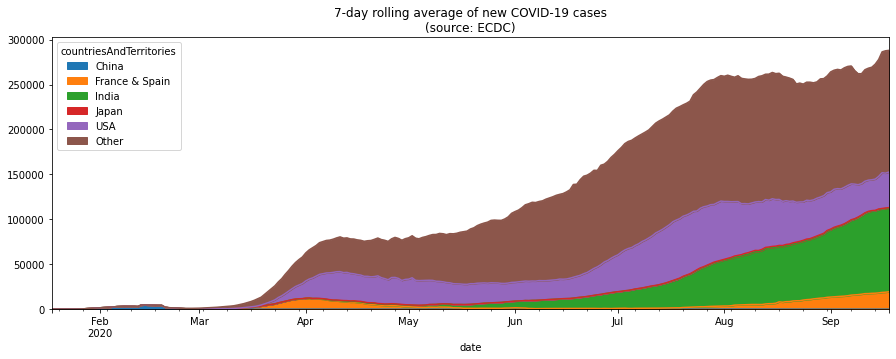

In [22]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['China', 'USA', 'India', 'France & Spain', 'Japan']
]
cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['China', 'USA', 'India', 'France', 'Spain', 'Japan']
]
new_cases_rolling_average.assign(
    **{'France & Spain': lambda x: x.France + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols2].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

## **Task 3**

In [24]:
quakes = pd.read_csv('data/earthquakes.csv')

Text(0, 0.5, 'count')

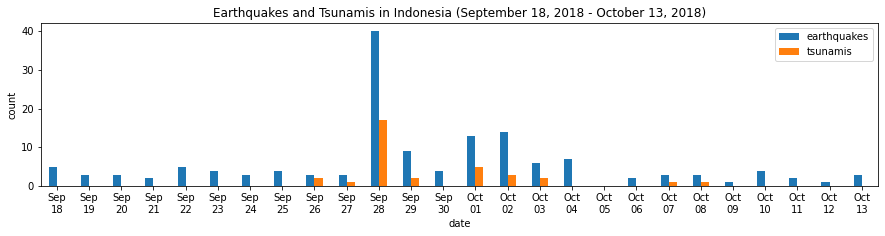

In [25]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

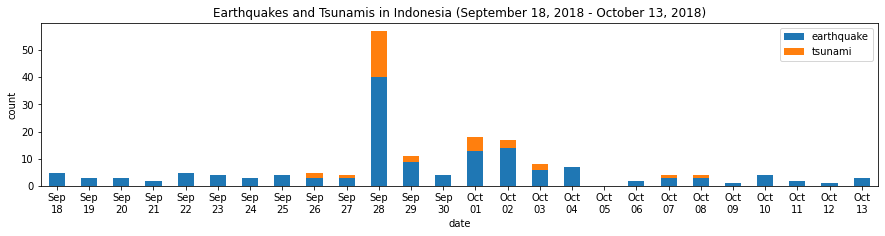

In [26]:
indonesia_quakes[['earthquake', 'tsunami']].plot.bar(
    ylabel='count', xlabel='date', figsize=(15, 3),
    rot=0, title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked=True
)

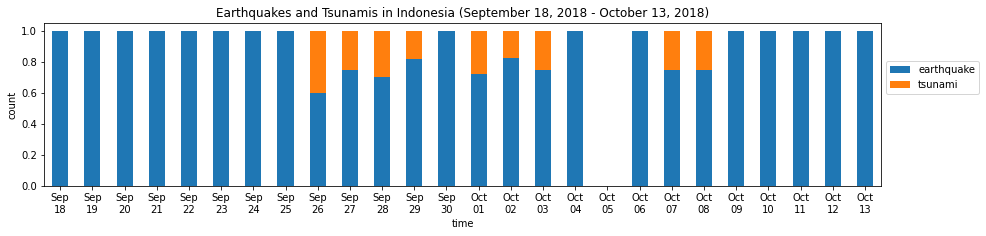

In [27]:
normalized_indonesia_quakes = indonesia_quakes[['earthquake', 'tsunami']].fillna(0).apply(lambda x: x / x.sum(), axis=1)
niq = normalized_indonesia_quakes.plot.bar(
    stacked=True, rot=0, figsize=(15,3),
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    ylabel='count'
)
niq.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot